In [1]:
%run common-imports.ipynb

#  DATASET-3: Runge phenomenon


## Prerequisites

Before you study this notebook, please go through and understood the detailed notes in data science notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`

## Lab Goals

* explore this data, observe its statistical characteristics, visualize it.
* Next, will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

At the end of the lab, should have an understanding of the following:

1. The limitations of polynomial regression
2. Runge phenomenon

In [2]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/dataset-3.csv")

In [3]:
data.head()

,x,y
0,5.130559,0.032875
1,9.158972,0.006139
2,0.070907,0.159699
3,-5.424548,0.010495
4,-2.526089,0.025251


#### Descriptive statistics


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,99.0,0.754140,5.735378,-9.983914,-4.295744,1.904103,5.175448,9.986022
y,99.0,0.054447,0.075199,-0.013830,0.001989,0.011805,0.101018,0.227936


#### Missing Values Analysis


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling

This is a useful tool to get a quick sense of the dataset. If you have not installed it yet, comment the below cell, and run it:

In [6]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **guess what the correlation is between the variables?** What does it say about the relationship between $x$ and $y$?

Is this data reminiscent of some ubiquitous curve you encountered?

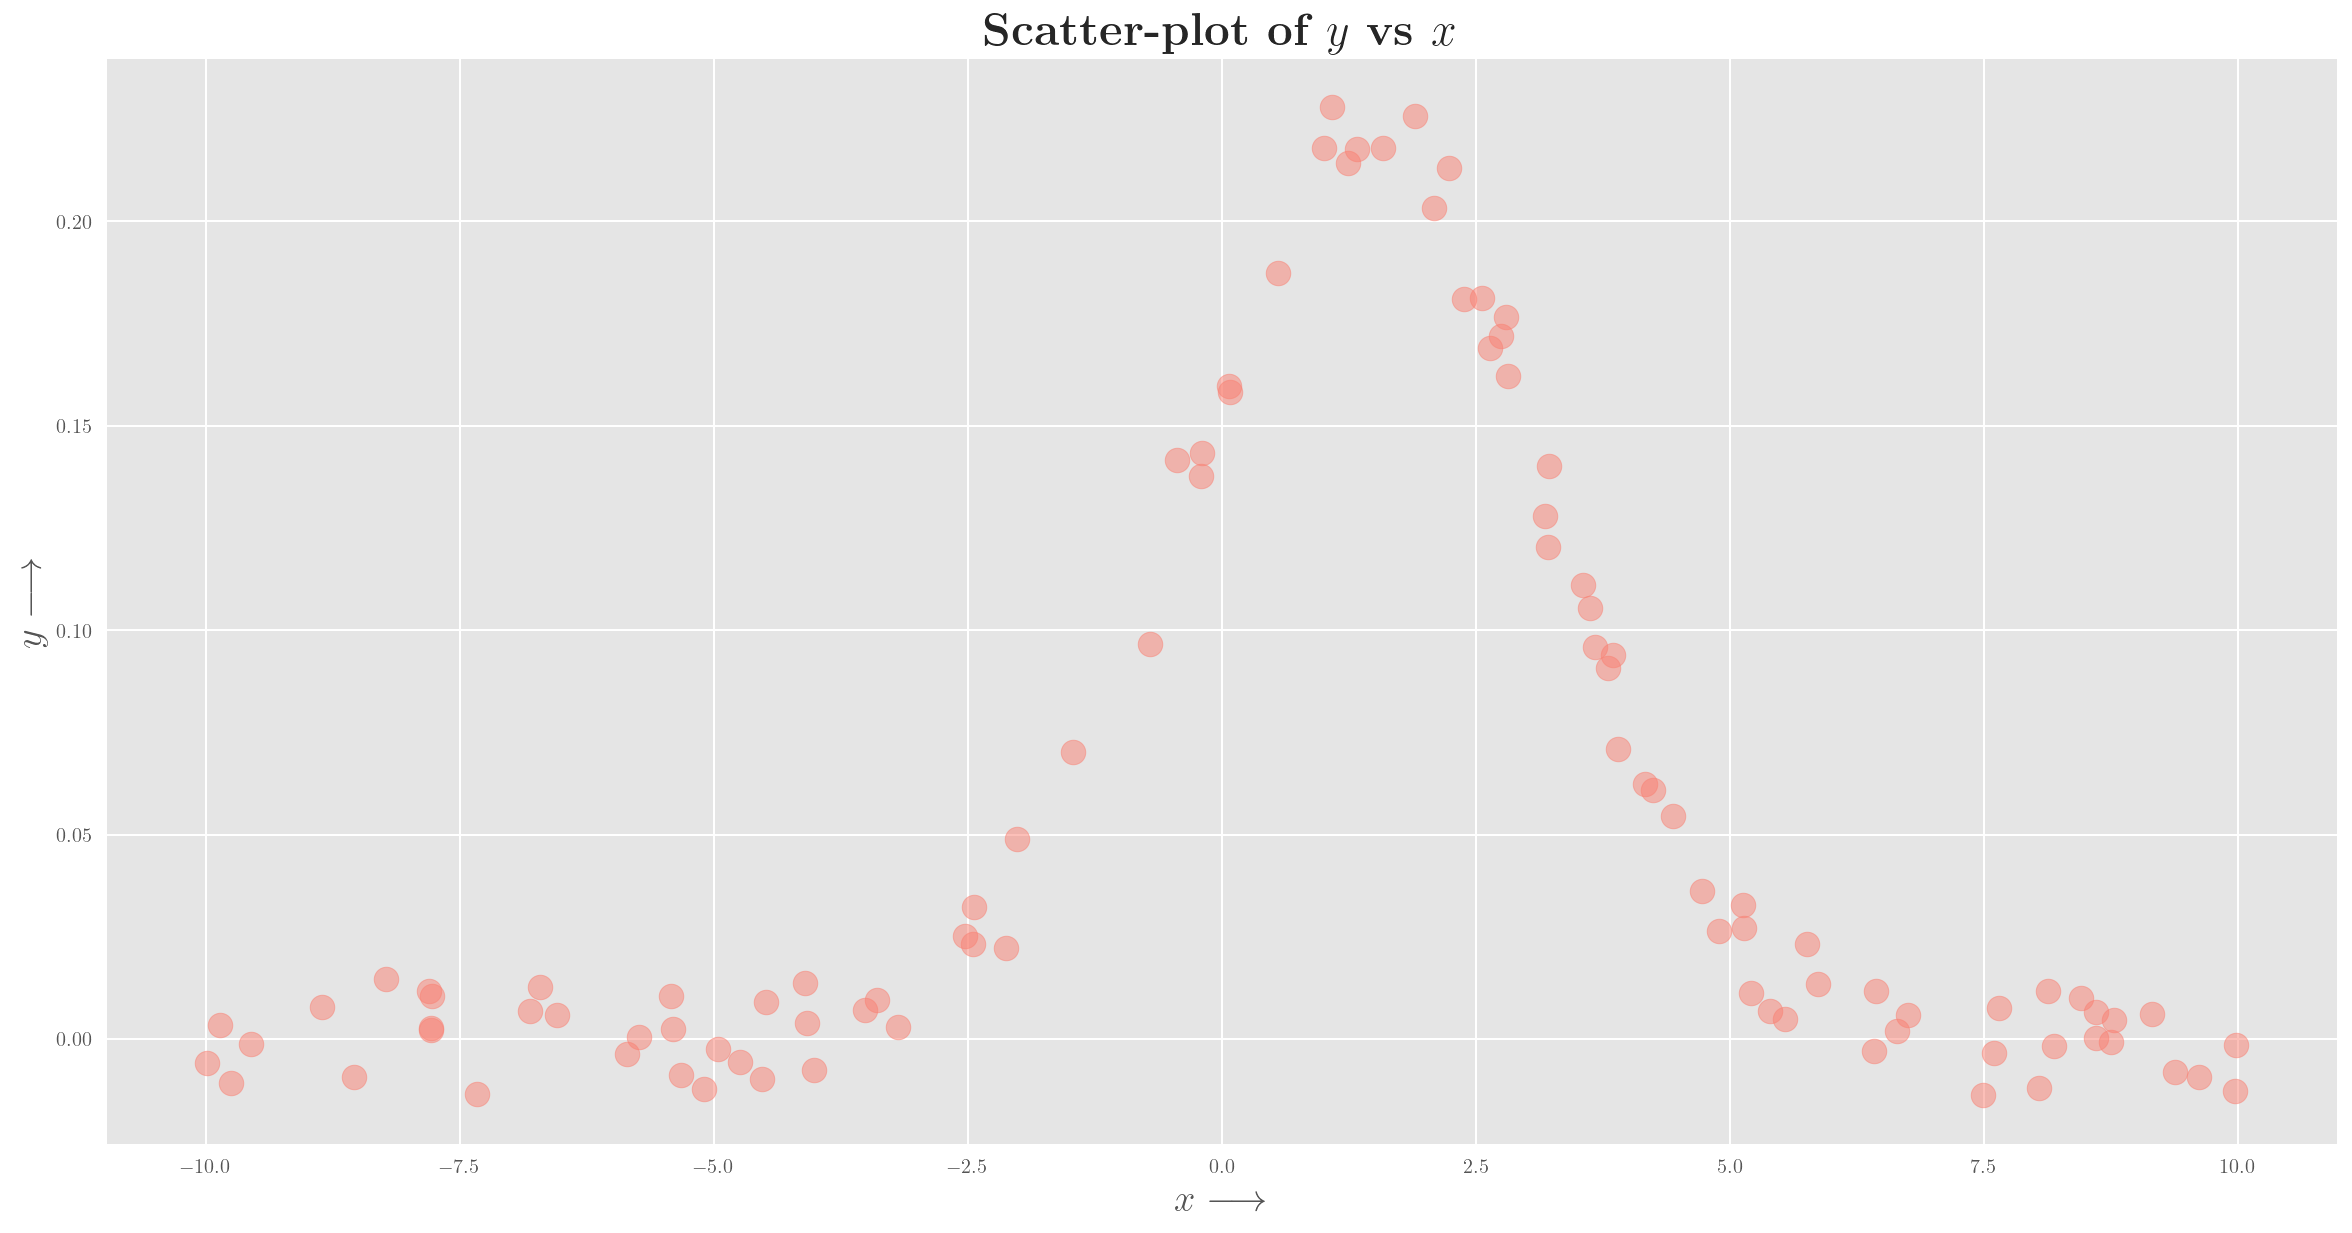

In [7]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance. 

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [8]:
X, y = data[['x']], data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [10]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [11]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 0.048949776703584615, Slope: [0.00294115]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [12]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.01
Coefficient of Determination (R^2):-0.05184296866270177


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

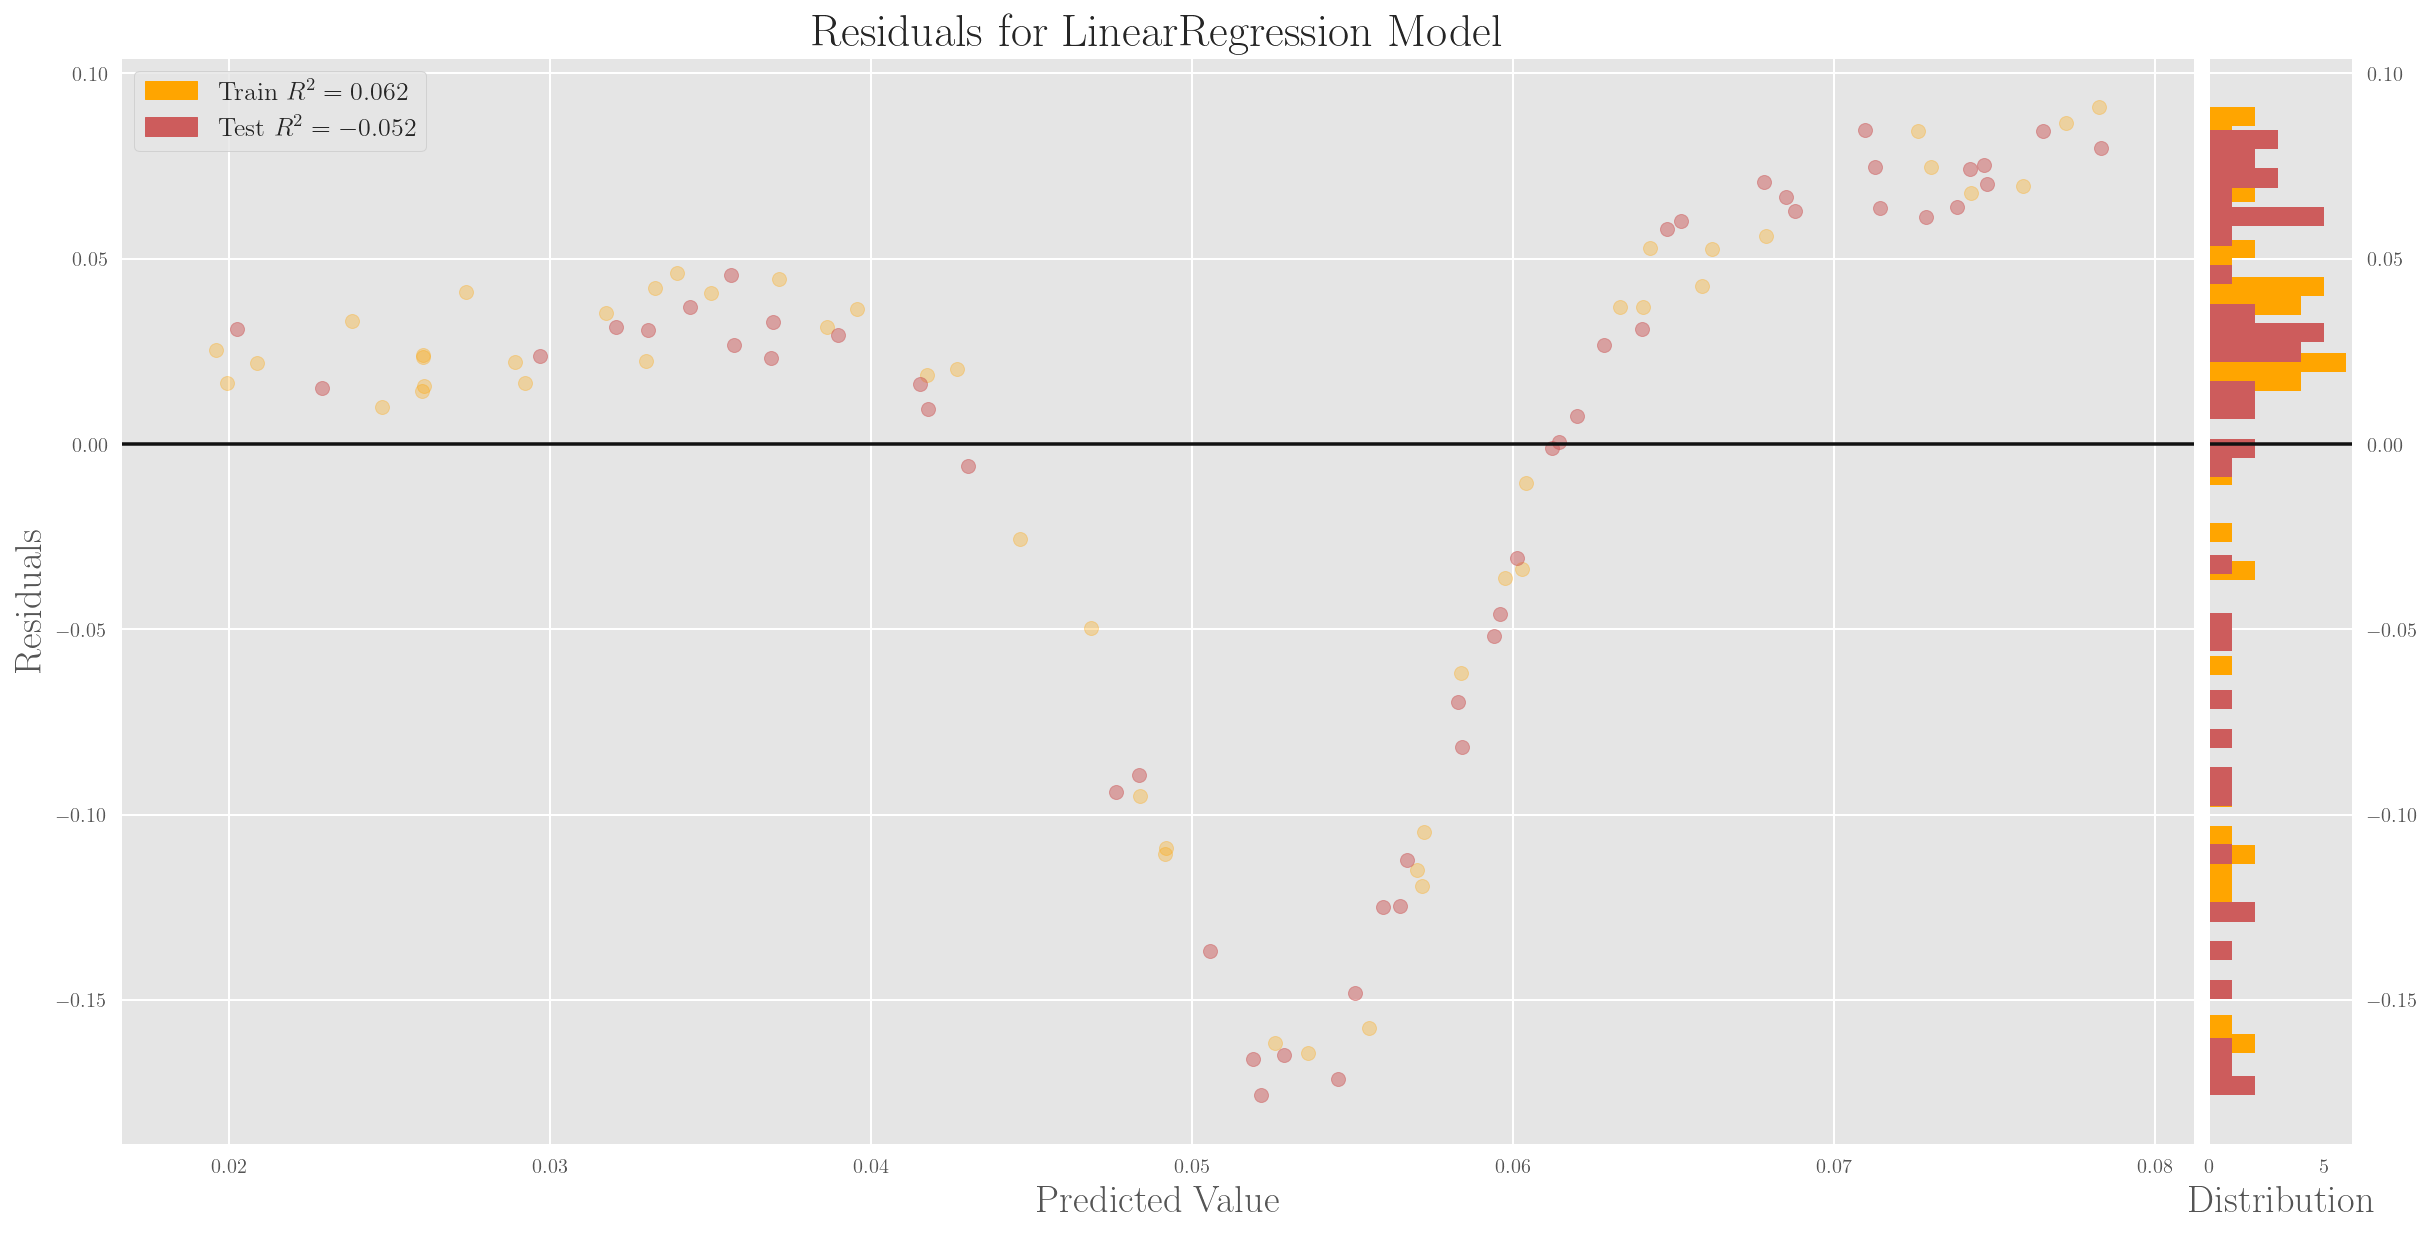

In [13]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [14]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

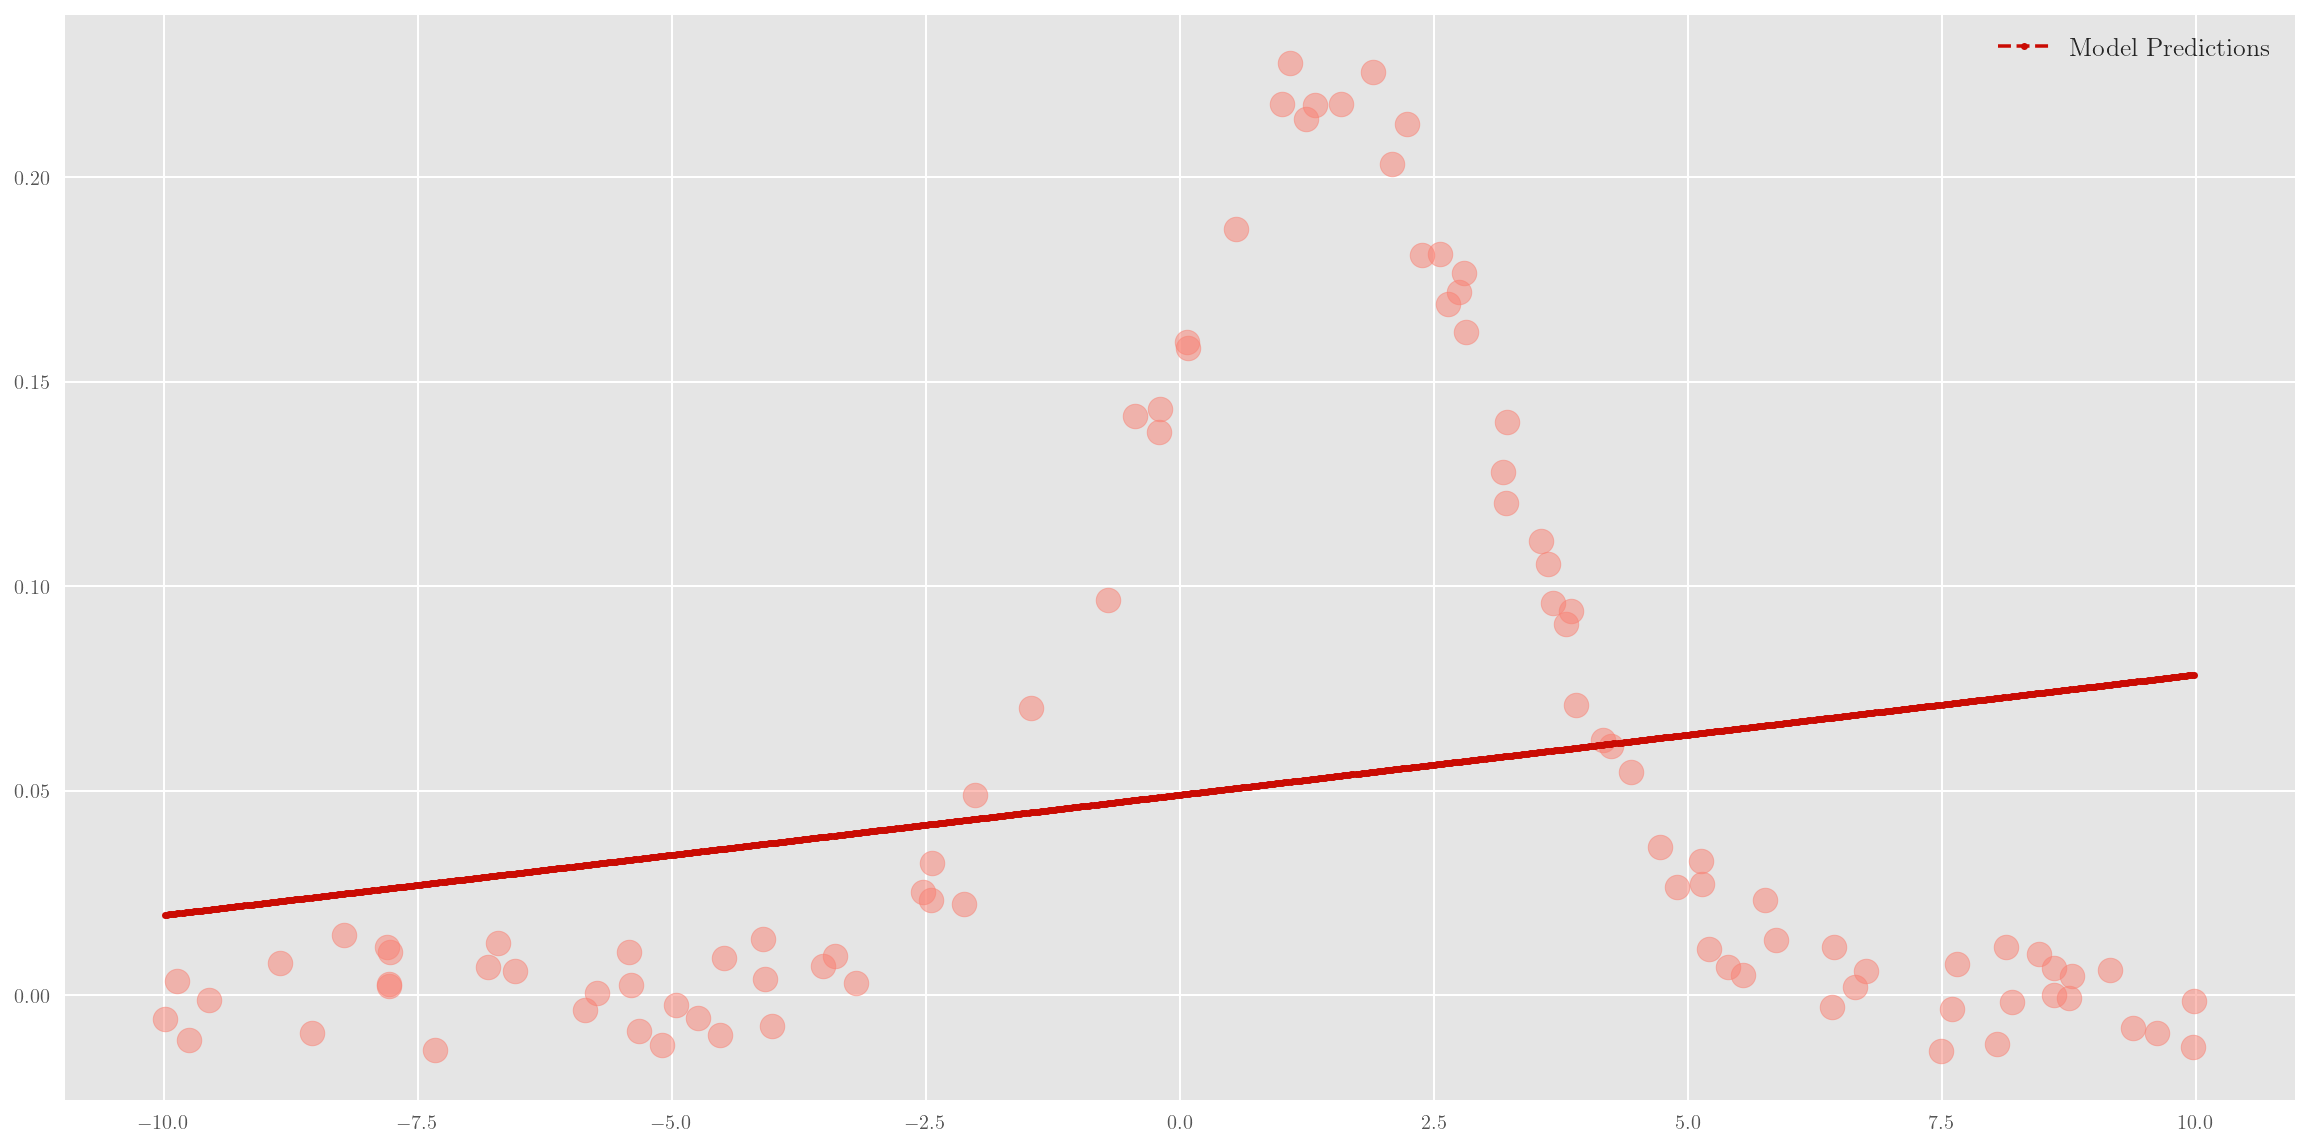

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This linear model has, as one would have expected by now, failed terribly!

# Polynomial Regression

adding polynomial features to the dataset, and then performing the regression can be an effective tool. Will this work here? Let's find out.

following steps have merged:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [16]:
degree     = 7
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  4.16727041e-02 -8.80176385e-03 -2.27792074e-03
  1.51733311e-04  3.72412831e-05 -8.04777326e-07 -1.88232104e-07]
Mean squared error: 0.00
Coefficient of Determination (R^2):0.9390509448320267


experiment with polynomials of different degrees, we find that it takes polynomials of atleast the seventh degree to get a good value for the coefficient of determination. 

We may have finally trained an effective regression model for this data. It is time to confirm our belief by proceeding now with the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

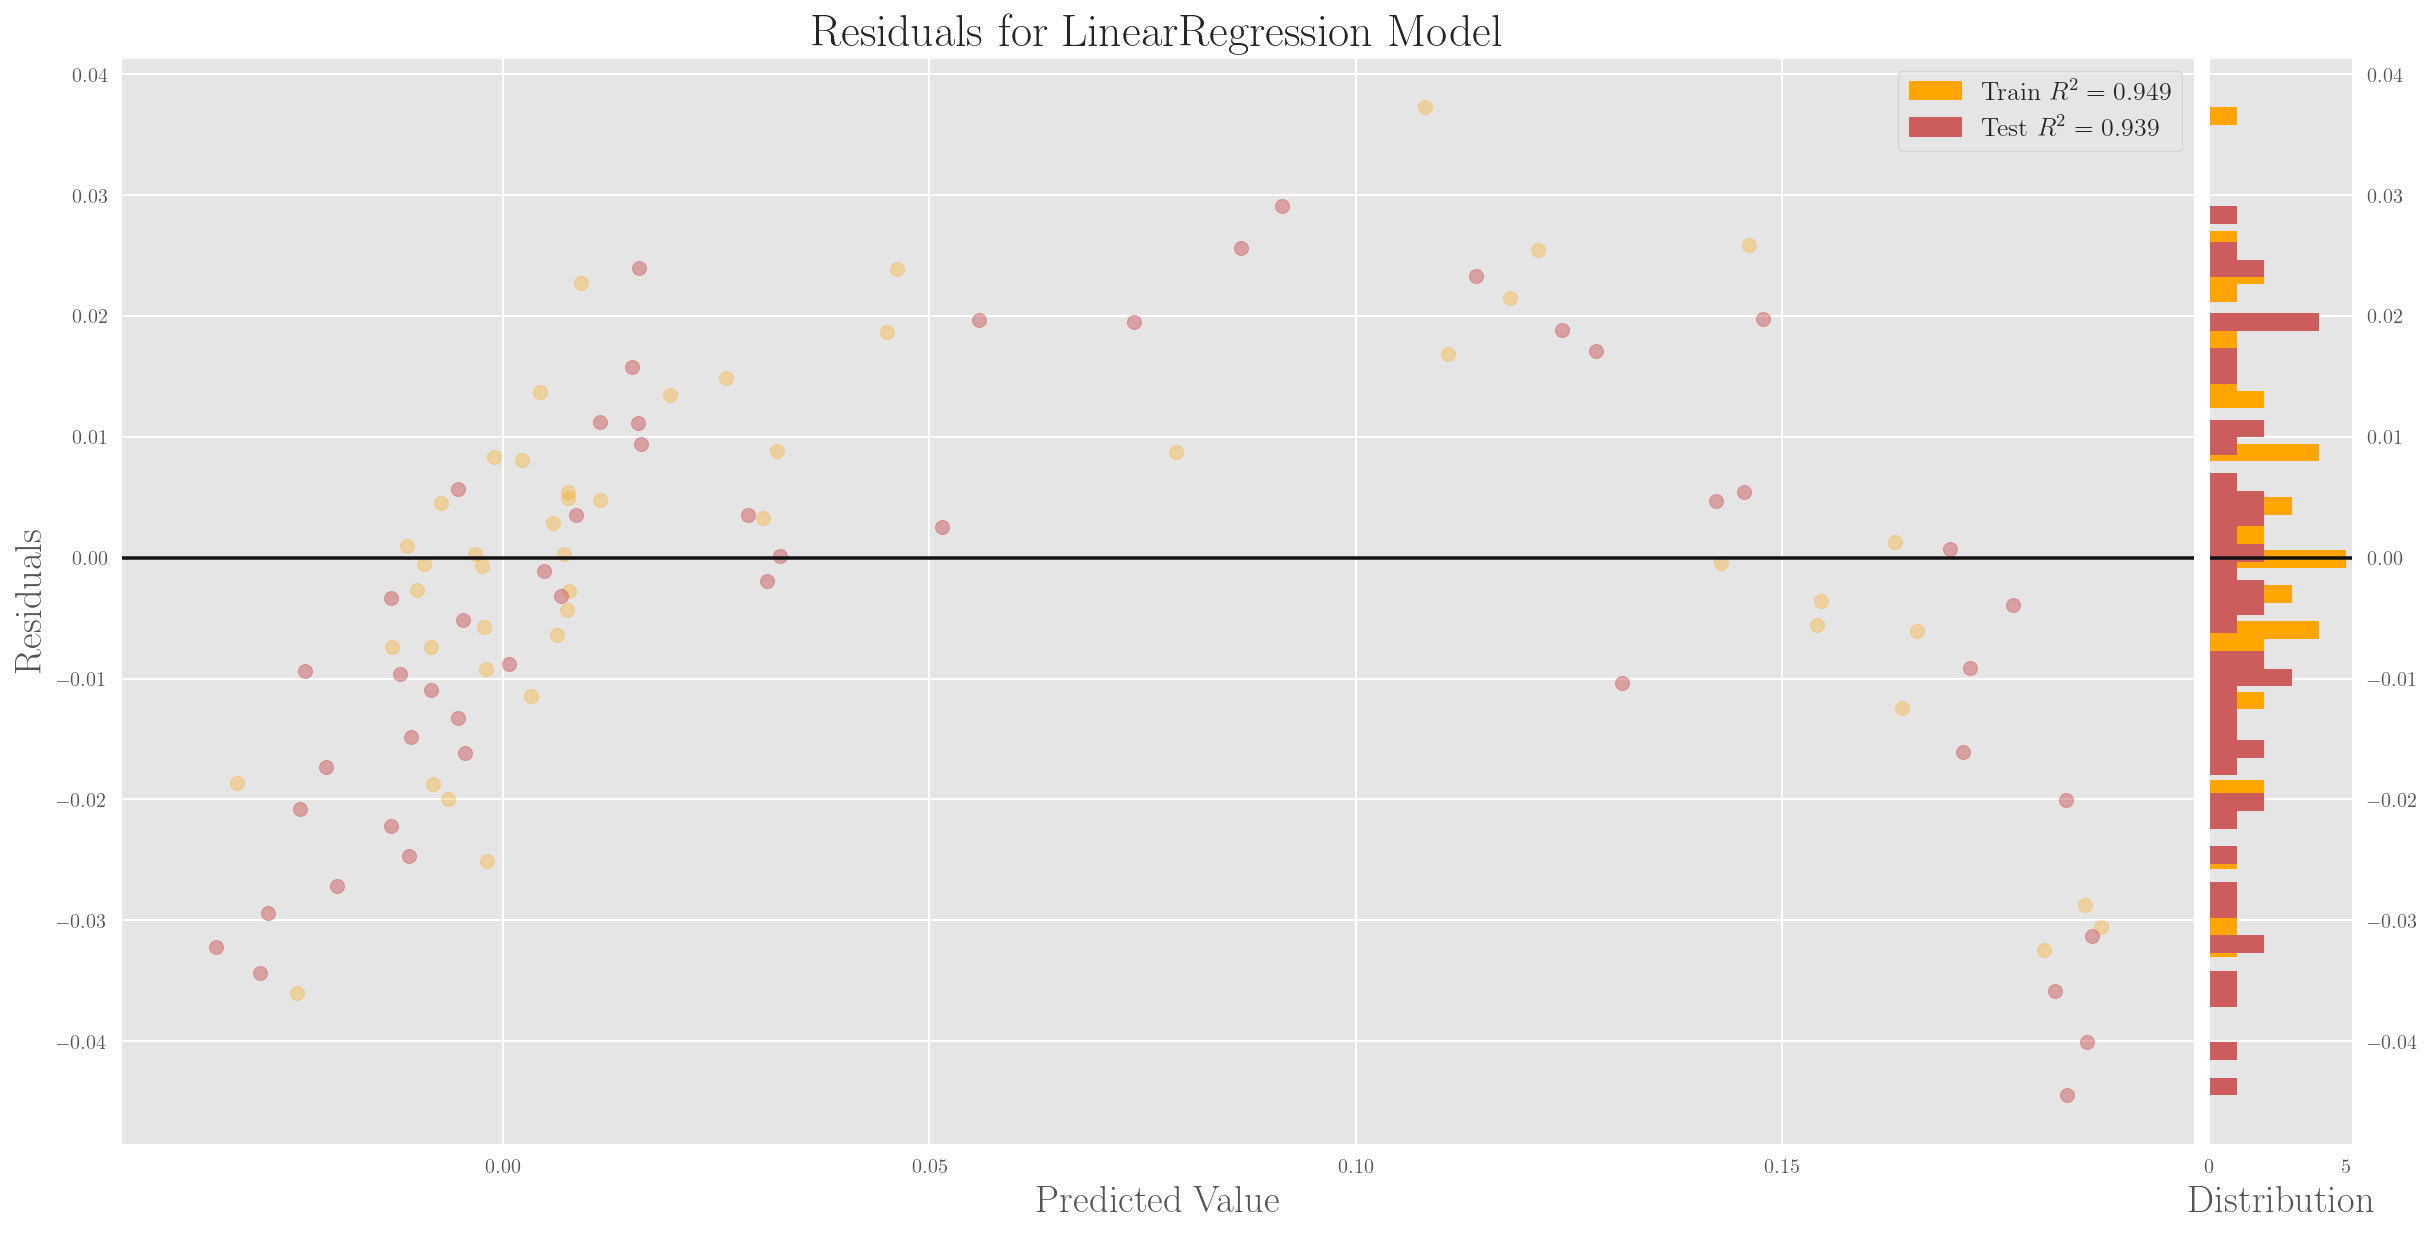

In [17]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

This is rather a disappointment: the plot has a clearly discernible pattern. Thus we may not have found so good a model, after all. What possibly could be the problem? Let's explore.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [18]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

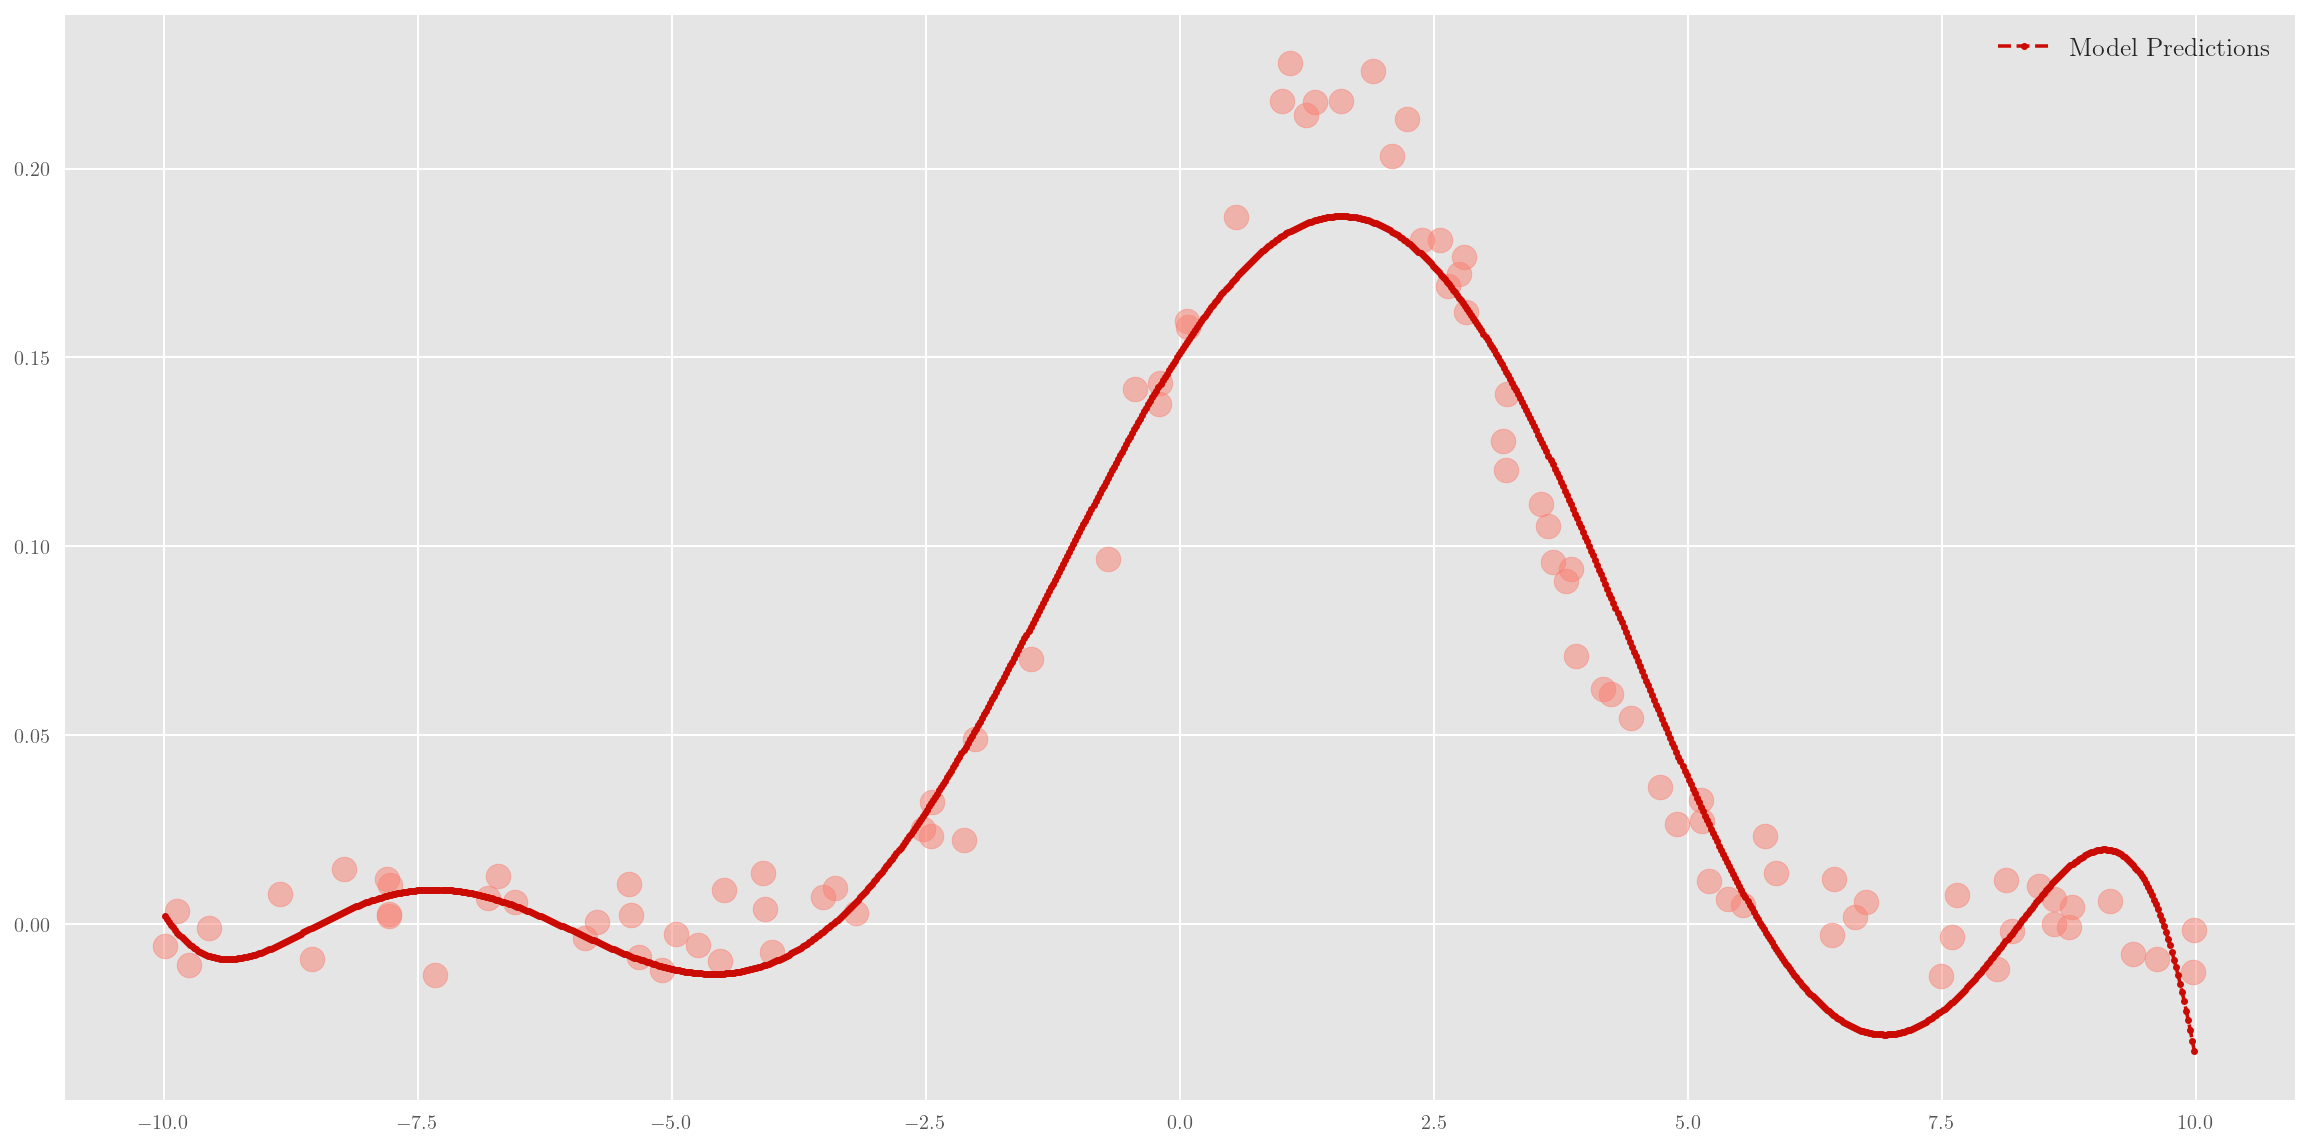

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

## Runge Phenomenon

Observe how the prediction curve seems to be oscillating towards the left and right peripheries. This phenomenon is intrinsic to polynomial regression with high degrees of the polynomial, when dealing with regions of data sparcity, as near the ends. Runge discovered it over a hundred years ago, in 1901, as a fundamental limitation of polynomial regression.

Learn more about it at: https://en.wikipedia.org/wiki/Runge%27s_phenomenon

# Conclusion

Polynomial regression is a powerful tool in the data science arsenal; however, it has it limits of applicability. Runge phenomenon points to one such limitation. 
